In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Cargar la imagen

In [2]:
!wget https://res.cloudinary.com/dnz4gqdqw/image/upload/v1759856432/louvre.png

--2025-10-07 17:03:44--  https://res.cloudinary.com/dnz4gqdqw/image/upload/v1759856432/louvre.png
Resolving res.cloudinary.com (res.cloudinary.com)... 104.16.78.6, 104.16.79.6, 2600:1409:9800:168d::523, ...
Connecting to res.cloudinary.com (res.cloudinary.com)|104.16.78.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 790510 (772K) [image/png]
Saving to: ‘louvre.png’

louvre.png          100%[===================>] 771.98K  --.-KB/s    in 0.03s   

2025-10-07 17:03:45 (23.8 MB/s) - ‘louvre.png’ saved [790510/790510]



size =  (1024, 1024)


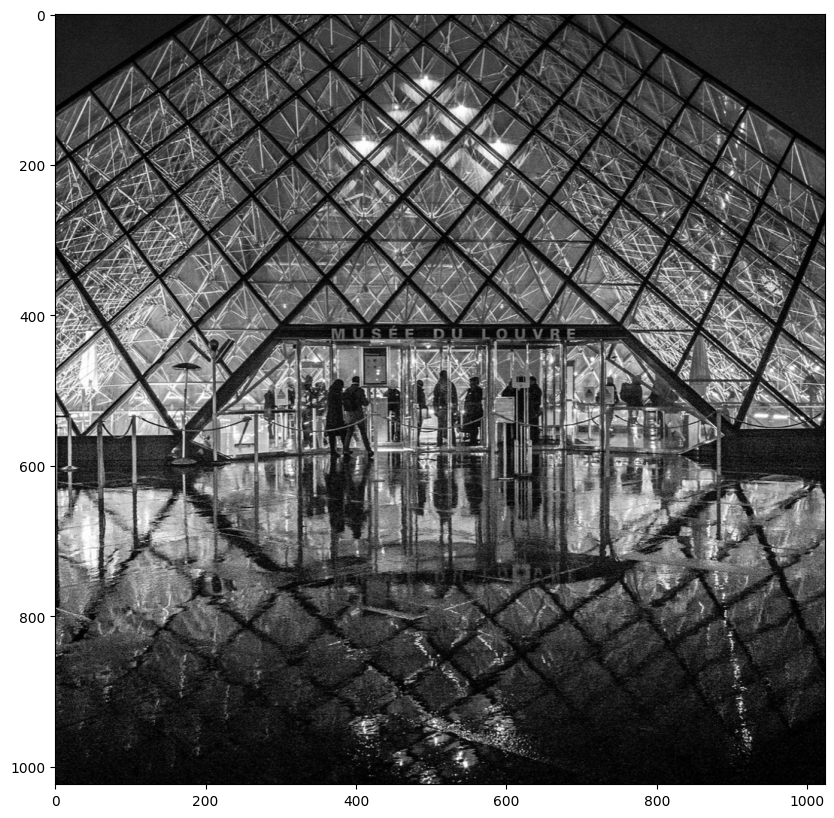

In [3]:
X = cv2.imread('louvre.png',0)
print('size = ',X.shape)
plt.figure(figsize=(10,10))
plt.imshow(X,cmap='gray')
plt.show()

#Transformacion geometrica

In [4]:
# Implementación de interpolación se realiza por truncamiento
def geo_transformation(X, A, Yshape=None):

    if Yshape is None:
        (N,M) = X.shape
    else:
        (N,M) = Yshape
    Y = np.zeros(((N,M)),np.uint8)

    m = np.ones((N*M,3))
    t = 0
    for i in range(N):
        for j in range(M):
            m[t,0:3] = [i,j,1]
            t = t+1

    m0 = np.dot(A,m.T)    # (i,j) -> (i0,j0) usando ecuación indicada arriba
    mpf = np.fix(m0).astype(int) # truncamiento

    # verificación que las coordenadas (i0,j0) pertenezcan a la imagen
    i0 = mpf[0,:]
    j0 = mpf[1,:]
    kti = np.logical_and(i0>=0,i0<N)
    ktj = np.logical_and(j0>=0,j0<M)
    kt = np.logical_and(kti,ktj)

    # poblamiento de la imagen de salida
    t = 0
    for i in range(N):
        for j in range(M):
            if kt[t]:
                Y[i,j] = X[i0[t],j0[t]]
            t = t+1

    return Y

##Traslación

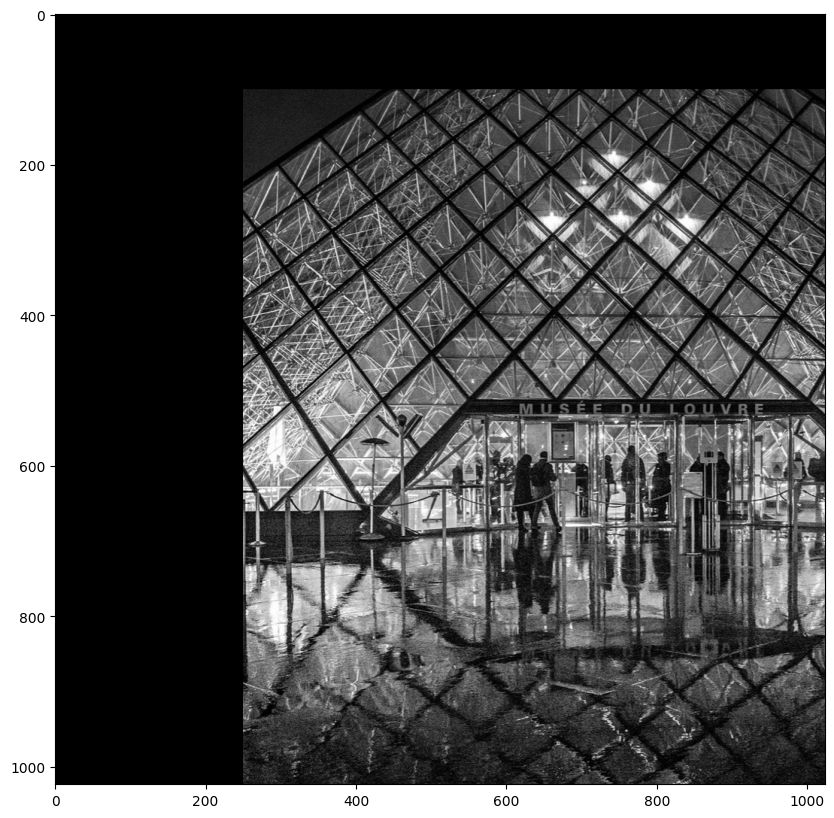

In [5]:
a11 = 1
a12 = 0
a13 = -100

a21 = 0
a22 = 1
a23 = -250

a1 = np.array(([a11,a12,a13]))
a2 = np.array(([a21,a22,a23]))

A = np.vstack(([a1,a2]))

Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()

##Rotacion

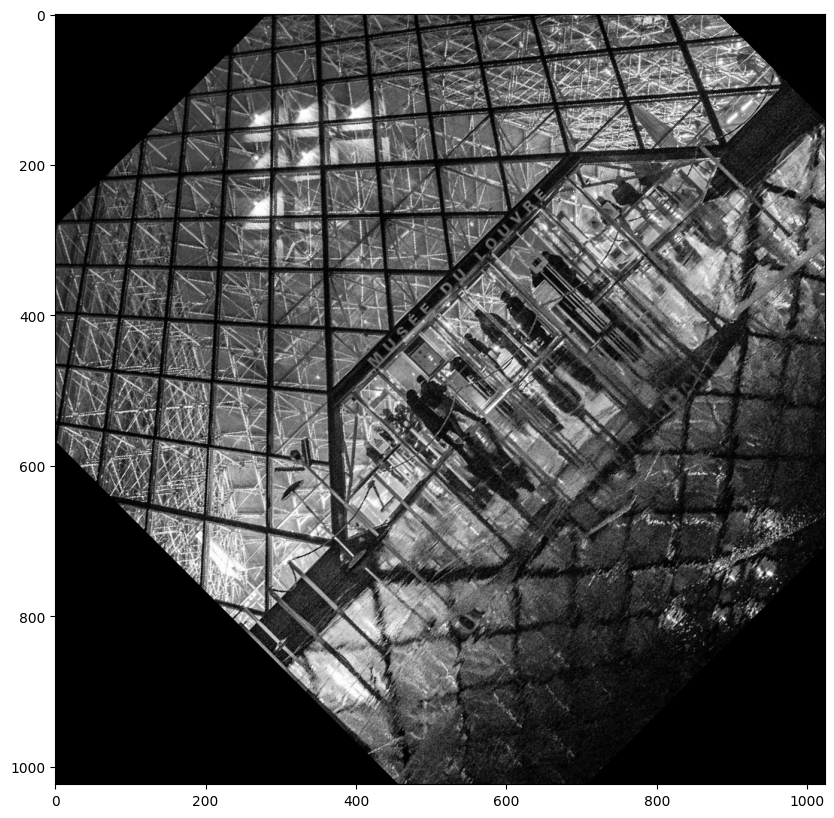

In [6]:
theta = 45.0 / 180.0 * np.pi
a11 = np.cos(theta)
a12 = np.sin(theta)
a13 = -200
a21 = -np.sin(theta)
a22 = np.cos(theta)
a23 = 400

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A = np.vstack(([a1,a2]))
Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()

##Escala

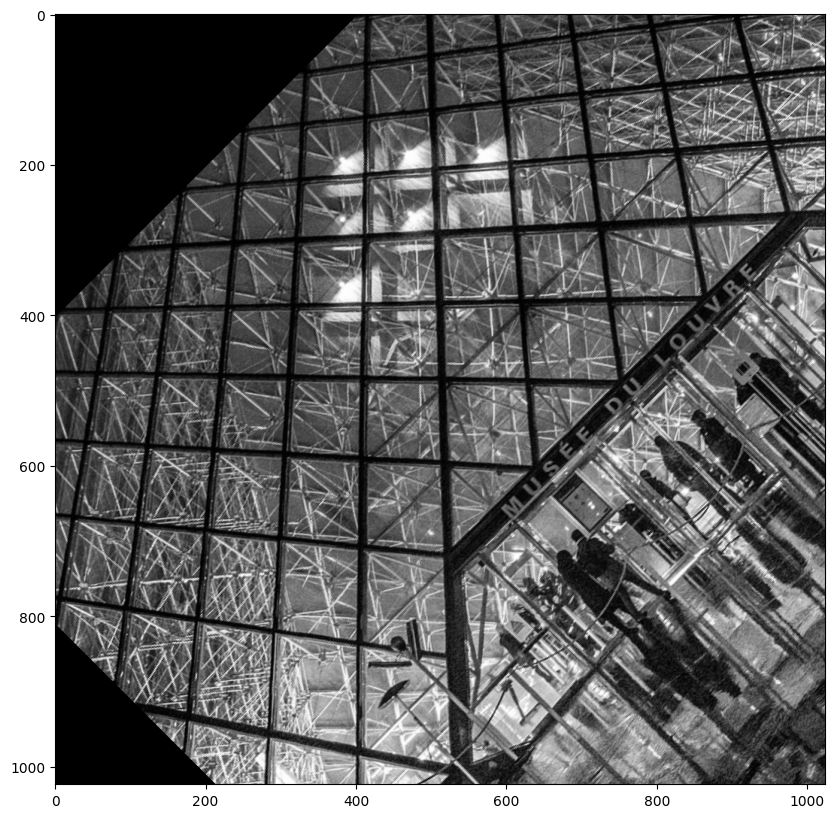

In [9]:
theta = 45.0 / 180.0 * np.pi
s = 0.7

a11 = s*np.cos(theta)
a12 = s*np.sin(theta)
a13 = -200

a21 = -s*np.sin(theta)
a22 = s*np.cos(theta)
a23 = 400

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A = np.vstack(([a1,a2]))
Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()

#Experimentiras

In [ ]:
!wget https://res.cloudinary.com/dnz4gqdqw/image/upload/v1759857323/relojdelado.png

size =  (192, 259)


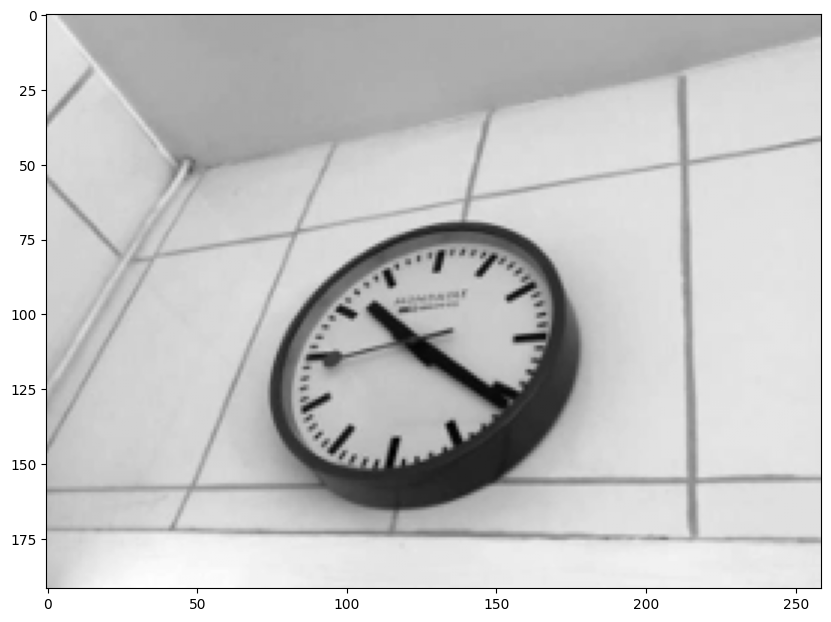

In [20]:
X = cv2.imread('relojdelado.png',0)
print('size = ',X.shape)
plt.figure(figsize=(10,10))
plt.imshow(X,cmap='gray')
plt.show()

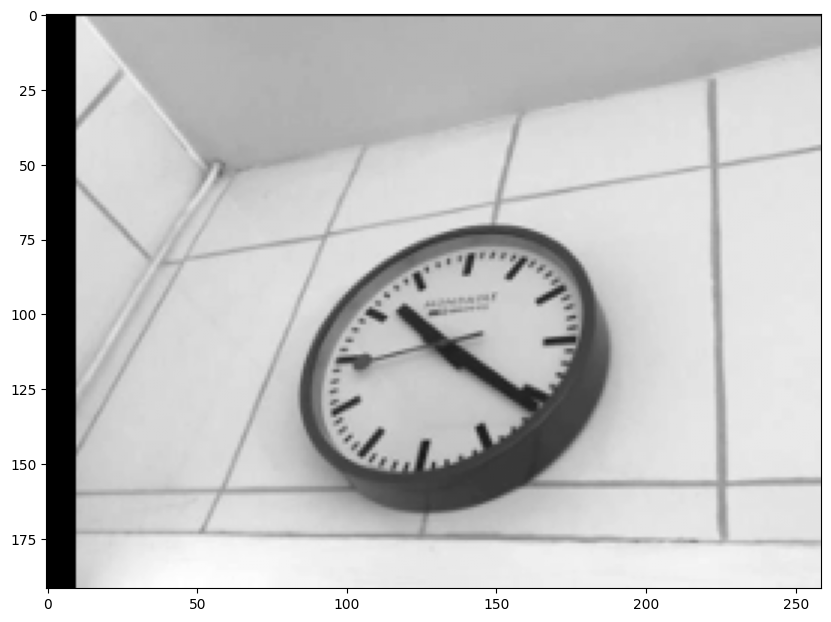

In [28]:
a11 = 1
a12 = 0
a13 = -1

a21 = 0
a22 = 1
a23 = -10

a1 = np.array(([a11,a12,a13]))
a2 = np.array(([a21,a22,a23]))

A = np.vstack(([a1,a2]))

Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()

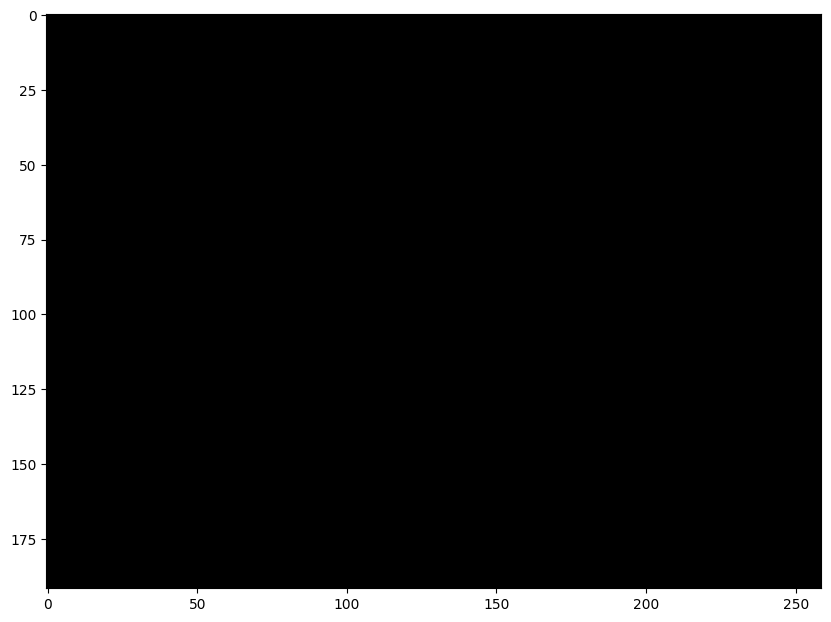

In [29]:
theta = 45.0 / 180.0 * np.pi
a11 = np.cos(theta)
a12 = np.sin(theta)
a13 = -200
a21 = -np.sin(theta)
a22 = np.cos(theta)
a23 = 400

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A = np.vstack(([a1,a2]))
Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()

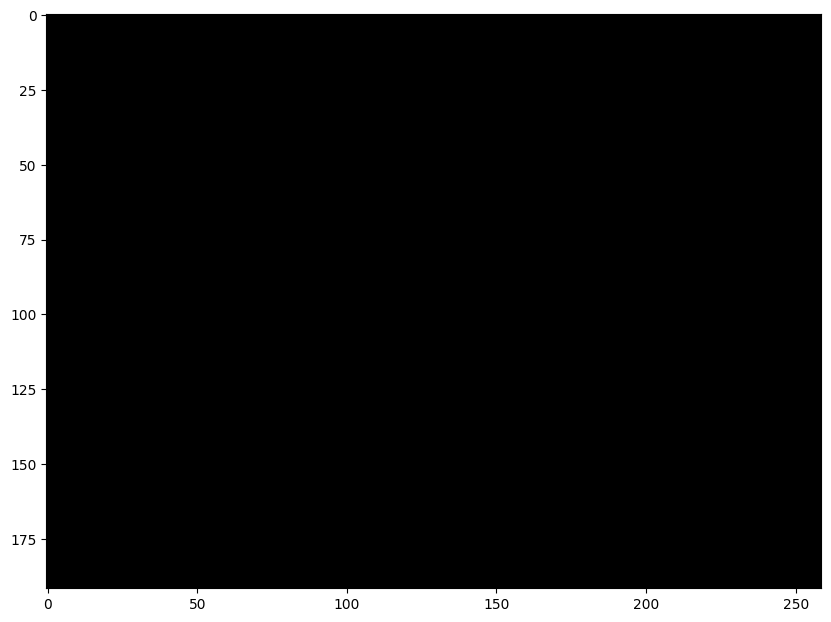

In [30]:
theta = 45.0 / 180.0 * np.pi
s = 0.7

a11 = s*np.cos(theta)
a12 = s*np.sin(theta)
a13 = -200

a21 = -s*np.sin(theta)
a22 = s*np.cos(theta)
a23 = 400

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A = np.vstack(([a1,a2]))
Y = geo_transformation(X,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()